In [5]:
'''


Cambios:
        - Renombre de columna Valor - Cuenta
        - Creacion de barras para analizar crecimiento / decrecimiento x a_o
        -Ajuste de practica de normalizacion, en base al crecimiento poblacional (# de poblacion en territorio mexicano), en los a;os.
                        - Para una mejor resolucion, deberiamos a ver normaliado en base a los estados, dado que es mayor la granulalidad, o incluso los municipios
                        
        - En este set de datos, no se puede hacer una correlacion 'Aun', por que no tenemos dos variables numericas, en un principio pense que el a;o era una, hahaha error mio.
        
        
        -Abra que tratar de nuevo sin pivotaje a ver si podemos obtener alguna informacion asi


'''

'\n\n\nCambios:\n\n\n\n'

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt


In [2]:
df_sex_agresion =  pd.read_csv('sexual_agre_cleaned.csv')

In [3]:
df_sex_agresion.shape

(12089, 6)

In [10]:
df_sex_agresion.head(3)

,A_o,Estado,Tipo_de_abuso,Subtipo_de_Abuso,Mes,Cuenta
0,2015,Puebla,Acoso sexual,Acoso sexual,Enero,11
1,2015,Puebla,Hostigamiento sexual,Hostigamiento sexual,Enero,1
2,2015,Puebla,Violaci�n simple,Violaci�n simple,Enero,43


In [9]:
df_sex_agresion.rename(columns={'Valor': 'Cuenta'}, inplace= True) # Sin el implace, tendriamos que instanciar otro objeto para poder cambiar el nombre

# Analisis Univariable

##### Variables Numericas

In [44]:
Frec_estado = df_sex_agresion['Estado'].value_counts()
print(Frec_estado)
# me mame en este caso no es necesario por el echo que la cantidad de datos sera igual, el valor de interes es la cuenta

Estado
Coahuila de Zaragoza               378
Queretaro                          378
Nuevo Leon                         378
Nayarit                            378
Morelos                            378
Michoacan de Ocampo                378
Mexico                             378
Jalisco                            378
Hidalgo                            378
Guerrero                           378
Guanajuato                         378
Durango                            378
Ciudad de Mexico                   378
Chihuahua                          378
Chiapas                            378
Colima                             378
Oaxaca                             378
Campeche                           378
Baja California Sur                378
Baja California                    378
Aguascalientes                     378
Zacatecas                          378
Yucatan                            378
Veracruz de Ignacio de la Llave    378
Tlaxcala                           378
Tamaulipas        

In [49]:
df_sex_agresion['Tipo_de_abuso'].unique()


array(['Acoso sexual', 'Hostigamiento sexual', 'Violaci�n simple',
       'Violaci�n equiparada',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Abuso sexual'], dtype=object)

In [53]:

cases_ac = sum(df_sex_agresion['Tipo_de_abuso'] == 'Acoso sexual')
cases_ab = sum(df_sex_agresion['Tipo_de_abuso'] == 'Abuso sexual')

print(cases_ab)
print(cases_ab)

2009
2009


In [ ]:
Relacion_tipo_abuso = df_sex_agresion['Tipo_de_abuso'] == ''

In [42]:
df_sex_agresion.columns

Index(['A_o', 'Estado', 'Tipo_de_abuso', 'Subtipo_de_Abuso', 'Mes', 'Cuenta',
       'Cuenta_Normalizada'],
      dtype='object')

#### Analisis Bi-Variable

###### Normalizacion datos

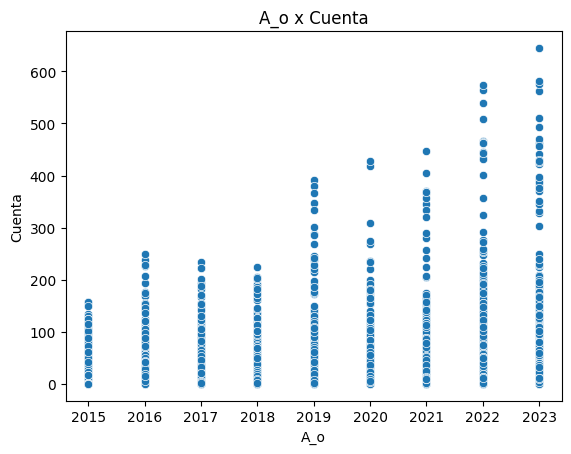

In [21]:
''' Dado que tenemos dos variables numericas empezare por ahi para ver como se relaciona el a;o con la cuenta'''

sns.scatterplot( x = 'A_o', y = 'Cuenta' , data= df_sex_agresion)
plt.title('A_o x Cuenta')
plt.show()

# NO ES UTIL EN REALIDAD, LOS DATOS ESTAN MUY SUPER PUESTOS

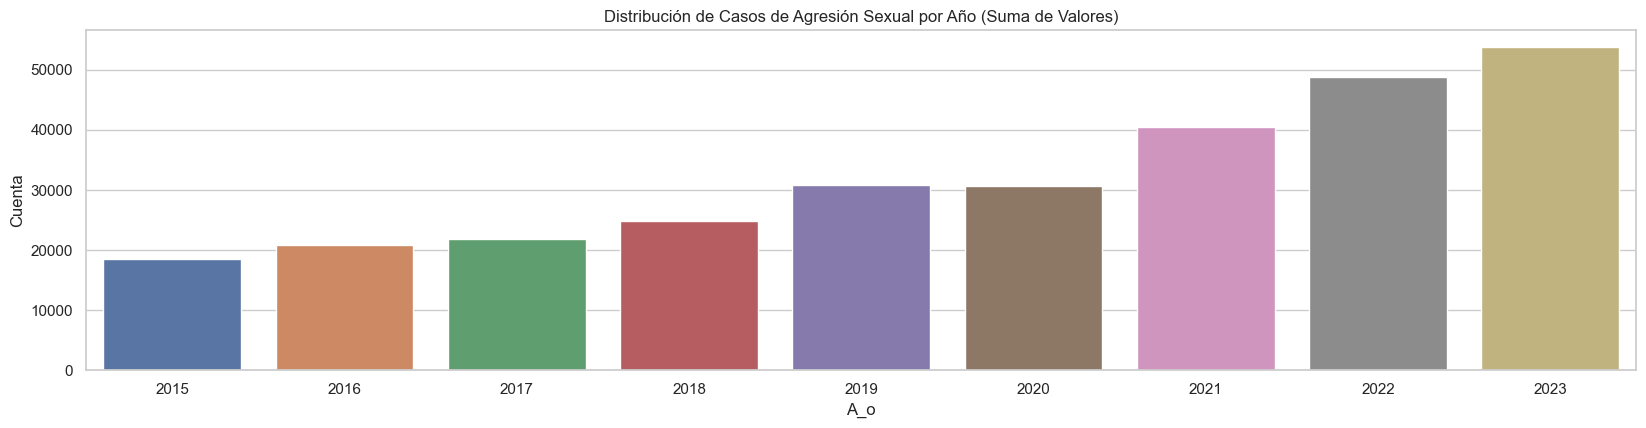

In [23]:
''' Cabe senalar que los datos no estan normalizados a el crecimiento de la poblacion, por lo cual no se puede saber
    si los casos estan disminuyendo o aumentando, necesitamos saber las cifras de la poblacion para poder hacer ese ajuste'''
    
    
# Configurar el estilo estético de las gráficas con Seaborn
sns.set_theme(style="whitegrid")

# Inicializar la figura donde se mostrarán las gráficas
# Establecemos el tamaño de la figura en 20x15
plt.figure(figsize=(20, 15))

# Crear un subplot para la primera gráfica
# El primer número '3' indica que habrá 3 filas de gráficos
# El segundo número '1' indica que habrá 1 columna de gráficos
# El tercer número '1' indica que este es el primer gráfico
plt.subplot(3, 1, 1)

# Crear un gráfico de barras para mostrar la distribución por año
# 'data=df' especifica el DataFrame que estamos usando
# 'x='A_o'' y 'y='Valor'' especifican las columnas del DataFrame que se usarán para el eje x e y, respectivamente
# 'estimator=sum' indica que queremos sumar los valores para cada categoría, en lugar de contarlos
# 'ci=None' elimina el intervalo de confianza que Seaborn muestra por defecto
sns.barplot(data=df_sex_agresion, x='A_o', y='Cuenta', estimator=sum, errorbar=None)

# Añadir un título a la gráfica
plt.title('Distribución de Casos de Agresión Sexual por Año (Suma de Valores)')

plt.show()

In [25]:
"""
Poblacion de mexico en esos a;os
"""

poblacion_por_ao = {
2015 :  119530753,
2016 :	121348000,
2017 :	122720000,
2018 :	124042000,
2019 :	125338000,
2020 :	126014024,
2021 :	128972000,
2022 :	130124000,
2023 :	131230000
}

# Añadir una nueva columna para los datos normalizados
df_sex_agresion['Cuenta_Normalizada'] = df_sex_agresion.apply(lambda row: (row['Cuenta'] / poblacion_por_ao[row['A_o']]) * 1000, axis=1)

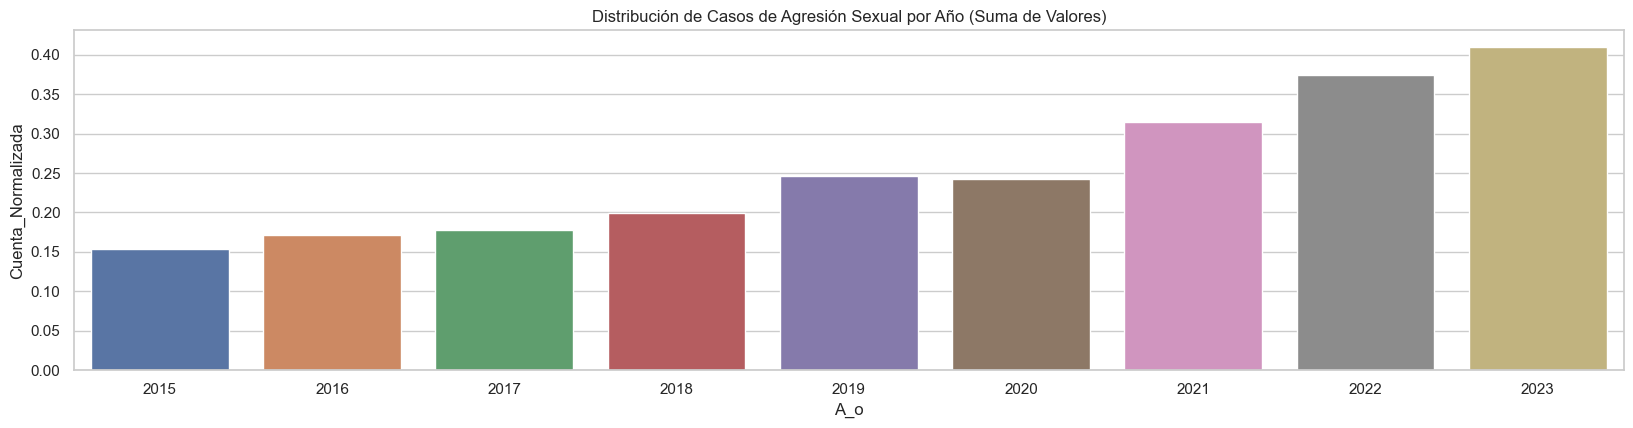

In [26]:
# Configurar el estilo estético de las gráficas con Seaborn
sns.set_theme(style="whitegrid")

# Inicializar la figura donde se mostrarán las gráficas
# Establecemos el tamaño de la figura en 20x15
plt.figure(figsize=(20, 15))

# Crear un subplot para la primera gráfica
# El primer número '3' indica que habrá 3 filas de gráficos
# El segundo número '1' indica que habrá 1 columna de gráficos
# El tercer número '1' indica que este es el primer gráfico
plt.subplot(3, 1, 1)

# Crear un gráfico de barras para mostrar la distribución por año
# 'data=df' especifica el DataFrame que estamos usando
# 'x='A_o'' y 'y='Valor'' especifican las columnas del DataFrame que se usarán para el eje x e y, respectivamente
# 'estimator=sum' indica que queremos sumar los valores para cada categoría, en lugar de contarlos
# 'ci=None' elimina el intervalo de confianza que Seaborn muestra por defecto
sns.barplot(data=df_sex_agresion, x='A_o', y='Cuenta_Normalizada', estimator=sum, errorbar=None)

# Añadir un título a la gráfica
plt.title('Distribución de Casos de Agresión Sexual por Año (Suma de Valores)')

plt.show()

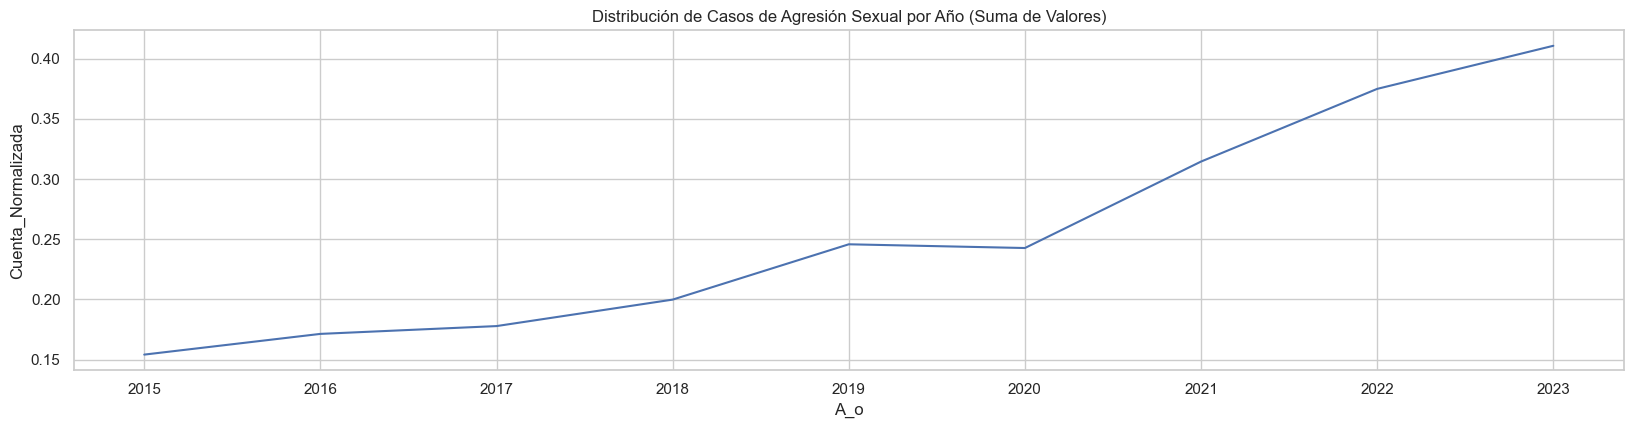

In [27]:
# Mantenemos el estilo y la figura como en tu código original
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 15))

# Usamos lineplot en lugar de barplot
plt.subplot(3, 1, 1)
sns.lineplot(data=df_sex_agresion, x='A_o', y='Cuenta_Normalizada', estimator=sum, err_style=None)

# Título
plt.title('Distribución de Casos de Agresión Sexual por Año (Suma de Valores)')

plt.show()

##

###### 

In [ ]:
''' Despues de normalizar podemos ver que en el 19 - 20, se redujo casi nada, entonces en otras palabras a estado creciendo con datos ya normalizados'''

###### Analisis Bi Variable Estado_ Cuenta normalizada

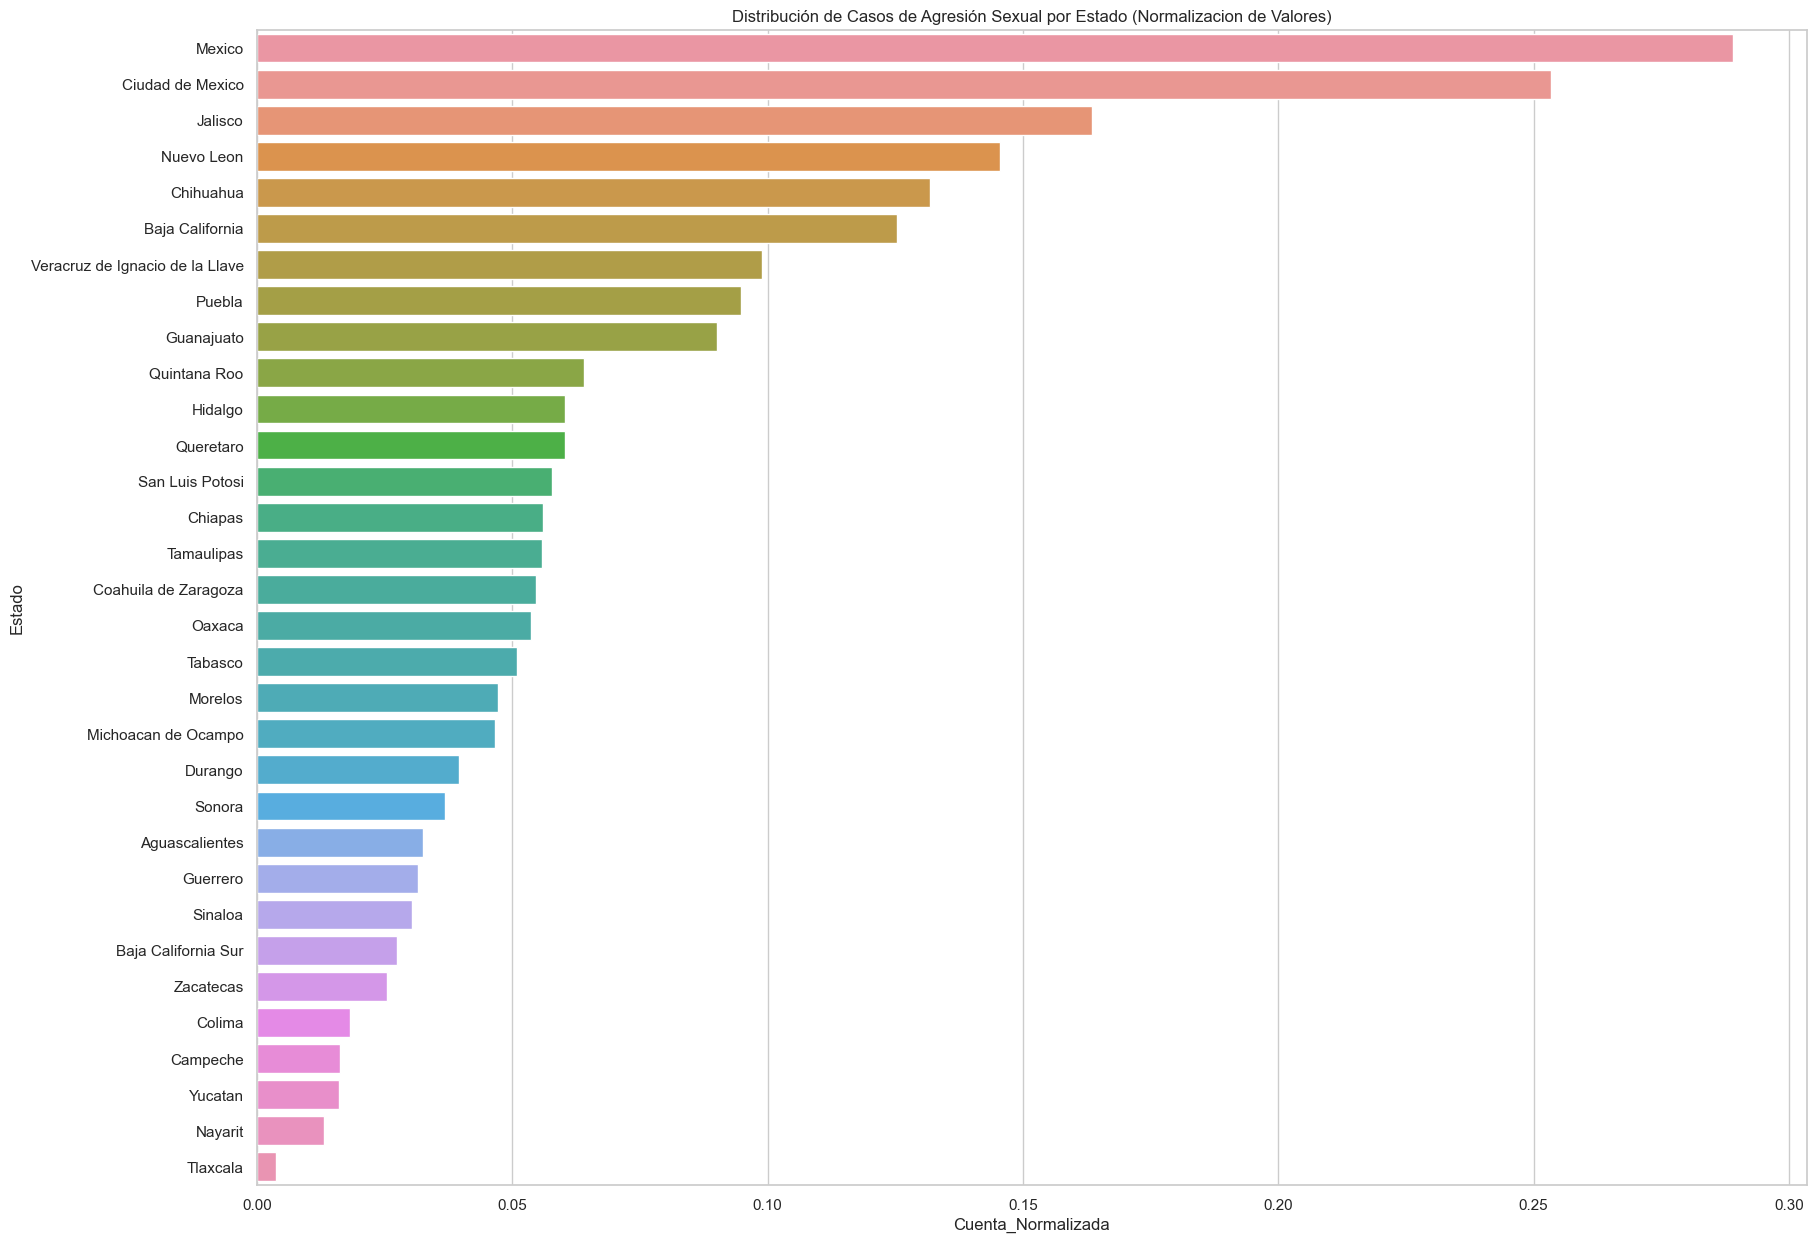

In [31]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 15))
sns.barplot(data=df_sex_agresion, y ='Estado', x ='Cuenta_Normalizada', estimator=sum, errorbar=None, order = df_sex_agresion.groupby('Estado')['Cuenta_Normalizada'].sum().sort_values(ascending=False).index)
#sns.barplot(data=df_sex_agreson, y='Estado', x='Valor', estimator=sum, ci= None, order = df_sex_agreson.groupby('Estado')['Valor'].sum().sort_values(ascending=False).index)
# Añadir un título a la gráfica
plt.title('Distribución de Casos de Agresión Sexual por Estado (Normalizacion de Valores)')

# plt.show()df_sex_agresion.groupby('Estado'): Aquí, el DataFrame se agrupa por la columna Estado. Esto crea un nuevo objeto de grupo donde los datos están agrupados según los distintos estados.

# ['Cuenta_Normalizada']: Después de agrupar, seleccionamos la columna Cuenta_Normalizada para realizar operaciones adicionales en ella.

# .sum(): Suma los valores de Cuenta_Normalizada para cada estado. Esto te da una suma total de Cuenta_Normalizada por estado.

# .sort_values(ascending=False): Ordena los valores sumados de forma descendente. Así, el estado con la mayor suma de Cuenta_Normalizada estará primero.

# .index: Finalmente, toma los índices de estos valores ordenados (que son los nombres de los estados) y los usa para el parámetro order.

# 🔄 Cómo Itera
# Primero, groupby agrupa todas las filas que tienen el mismo estado.
# Luego, para cada grupo, se suman los valores en la columna Cuenta_Normalizada.
# Estos valores sumados se ordenan de mayor a menor.
# Los índices (nombres de los estados) de estos valores ordenados se extraen y se usan para determinar el orden en que se mostrarán las barras en el gráfico.
#los indices son los estados, por asi decirlos, ordenados

In [ ]:
''' Antes de la pandemia, parecia haber establecido un ritmo y pensariamos que la curva comenzaria a aplanarce, pero parece que el resentimiento
    o algo en la pandemia, hubo mas casos, pero no creo que esto sea solo culpa de la pandemia, debe haber mas
'''

In [38]:
df_sex_agresion.columns

Index(['A_o', 'Estado', 'Tipo_de_abuso', 'Subtipo_de_Abuso', 'Mes', 'Cuenta',
       'Cuenta_Normalizada'],
      dtype='object')

Text(0.5, 1.0, 'Distribución de Casos de Agresión Sexual por Tipo_de_abuso (Normalizacion de Valores)')

C:\Users\Edgar\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  func(*args, **kwargs)
C:\Users\Edgar\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


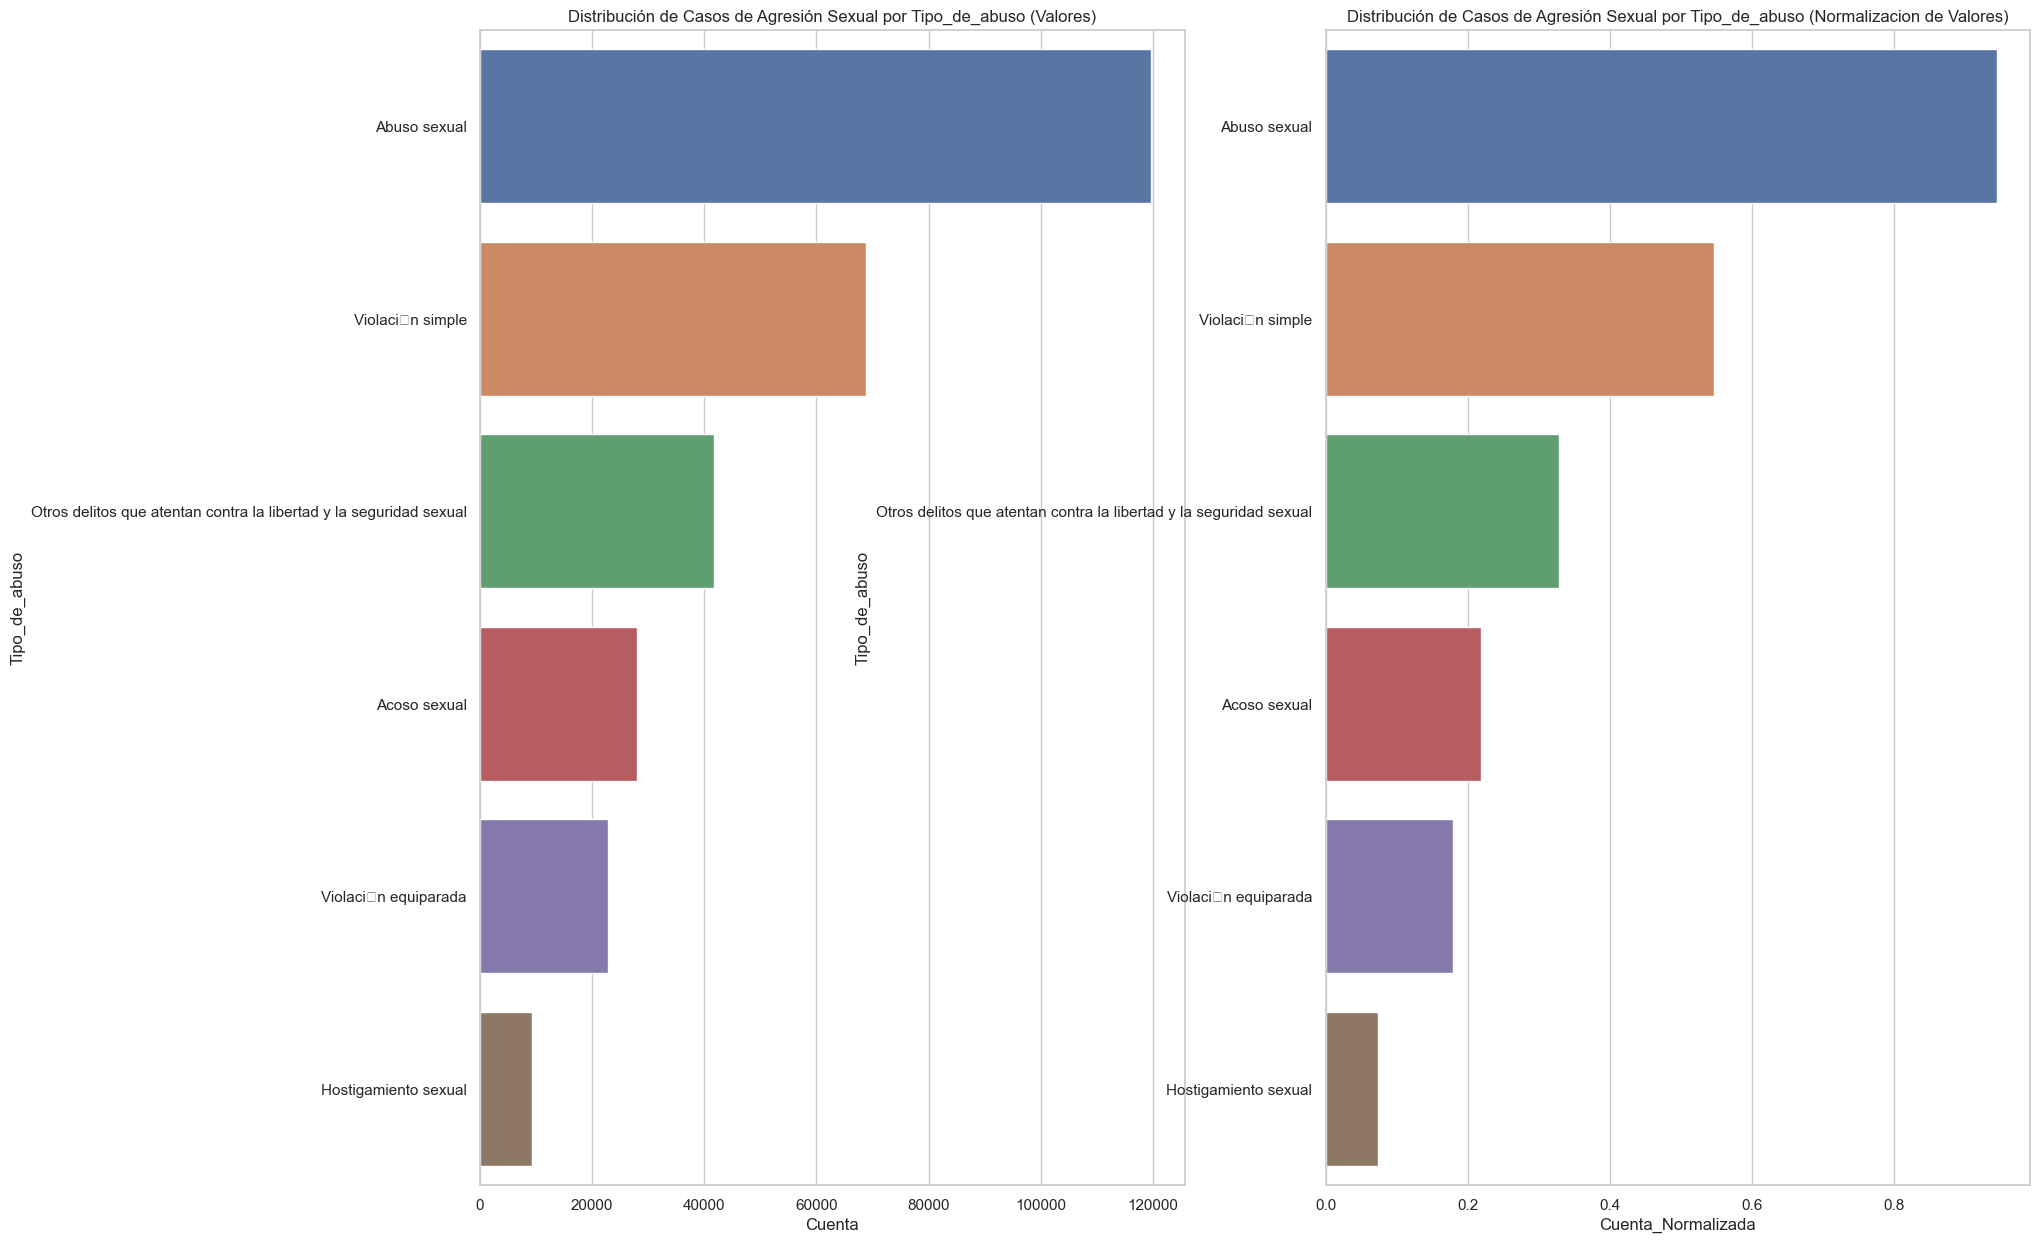

In [41]:
sns.set_theme(style='whitegrid') # Podriamos ver otros disenos a ver cual nos parece mas amigable / o el que simplemente nos guste mas

plt.figure(figsize=(20, 15))
plt.subplot(1,2,1)
sns.barplot(data=df_sex_agresion, y ='Tipo_de_abuso', x ='Cuenta', estimator=sum, errorbar=None, order = df_sex_agresion.groupby('Tipo_de_abuso')['Cuenta_Normalizada'].sum().sort_values(ascending=False).index)
plt.title('Distribución de Casos de Agresión Sexual por Tipo_de_abuso (Valores)')

plt.subplot(1,2,2)
sns.barplot(data=df_sex_agresion, y ='Tipo_de_abuso', x ='Cuenta_Normalizada', estimator=sum, errorbar=None, order = df_sex_agresion.groupby('Tipo_de_abuso')['Cuenta_Normalizada'].sum().sort_values(ascending=False).index)
plt.title('Distribución de Casos de Agresión Sexual por Tipo_de_abuso (Normalizacion de Valores)')
